<a href="https://colab.research.google.com/github/BelanVaidehee/BMLpracticals/blob/main/Experiment8bml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart (1).csv to heart (1).csv


In [ ]:
file_name = next(iter(uploaded))
print("Loaded file:", file_name)

df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print("\nFirst 5 rows of data:")
print(df.head())

print("\nColumns in dataset:")
print(df.columns)

Loaded file: heart (1).csv

First 5 rows of data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Columns in dataset:
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
target_column = 'target'

X = df.drop(columns=[target_column])
y = df[target_column]

print("\nFeature shape:", X.shape)
print("Target shape:", y.shape)



Feature shape: (1025, 13)
Target shape: (1025,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\n=== Evaluation on Test Data ===")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


=== Evaluation on Test Data ===
Accuracy: 0.8390243902439024

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       100
           1       0.82      0.88      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205

Confusion Matrix:
[[80 20]
 [13 92]]


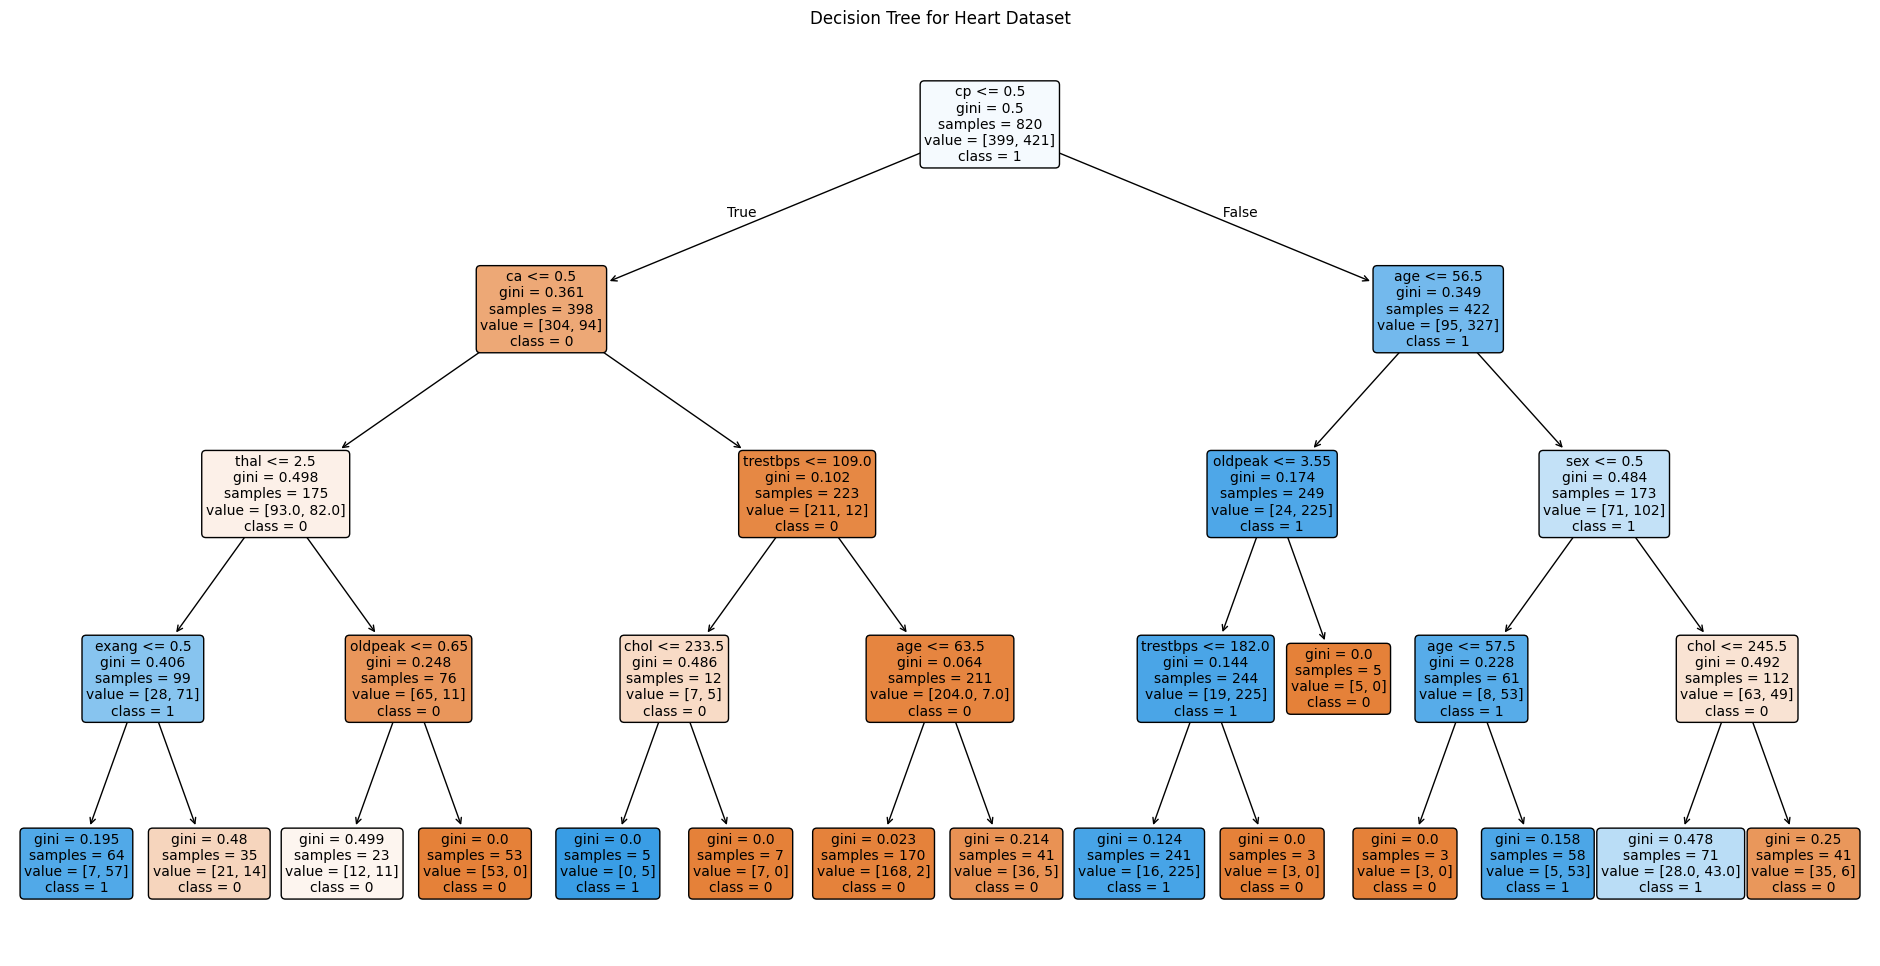

In [ ]:
plt.figure(figsize=(24, 12))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Heart Dataset")
plt.show()

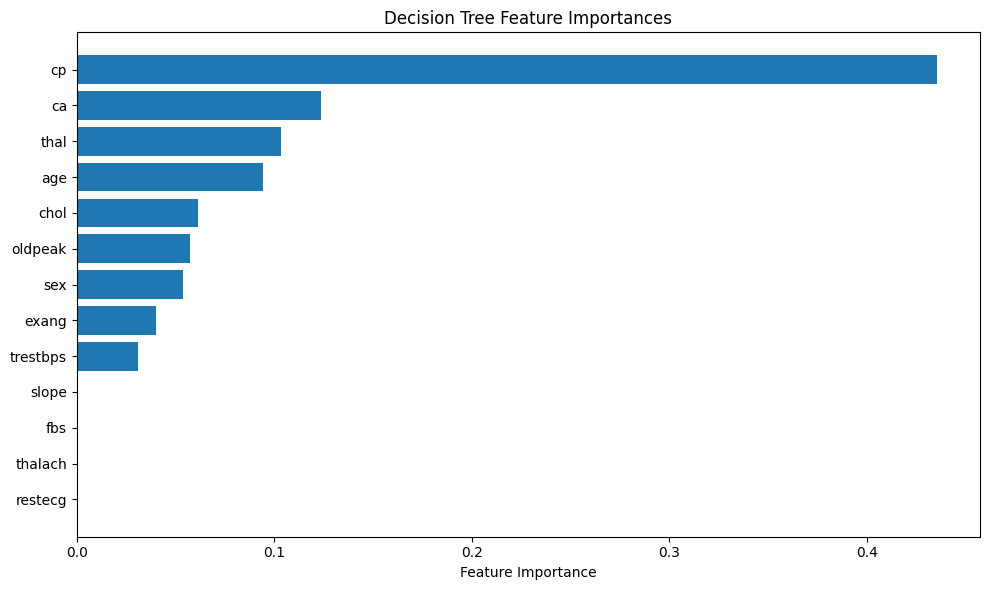

In [ ]:
importances = dt_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importances")
plt.tight_layout()
plt.show()